## SMOTE (Synthetic minority oversampling technique)

SMOTE(Synthetic minority oversmapling technique) is a technique in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the majority class by interploting between exisiting instances

So here we gonna see how to create an dataset with different library (the data set with imbalanced data) ,and we are try to apply the smote to get the balanced dataset

In [8]:
from sklearn.datasets import make_classification   ## The make_classsification used to create the binary classification 
# of multiple classification dataset    

In [9]:
x,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                          weights=[0.90],random_state=12)  ##This means on class is 90% more weight then other class 
## x is the independent feature and y is the dependent feature 

In [10]:
import pandas as pd 
df1 = pd.DataFrame(x,columns = ['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
df = pd.concat([df1,df2],axis=1)
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [11]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

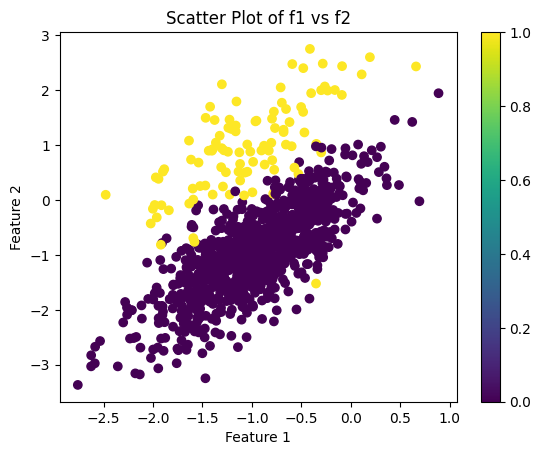

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'],df['f2'],c = df['target'])     ## here df['f1'] and df['f2'] are the x,y 
## The c = df['target'] is point to the color , target has two classification 0,1 the based on the color can be given 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of f1 vs f2')
plt.colorbar()
plt.show()        ## here we can able to see that , the yellow is minority and violet is the majority 

In [13]:
from imblearn.over_sampling import SMOTE     ## remember in this place at first it shows error because of the version of 
'''Version Incompatibility:
The latest versions of scikit-learn (for example, 1.5.1) have removed or relocated parse_version, which older versions of imbalanced-learn (such as 0.11.0) still try to import

.

This means that if you have upgraded scikit-learn without upgrading imbalanced-learn to a compatible version, you will see this import error'''


'Version Incompatibility:\nThe latest versions of scikit-learn (for example, 1.5.1) have removed or relocated parse_version, which older versions of imbalanced-learn (such as 0.11.0) still try to import\n\n.\n\nThis means that if you have upgraded scikit-learn without upgrading imbalanced-learn to a compatible version, you will see this import error'

In [14]:
## With this imblearn only we are going to connect all the points in the minority , and we gonna make the synthetic datapoints , useing interpolating
oversample = SMOTE()
x,y = oversample.fit_resample(df[['f1','f2']],df['target'])

In [16]:
x.shape

(1800, 2)

In [17]:
y.shape

(1800,)

In [18]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [20]:
len(y[y==0])   # y[y==0]

900

In [22]:
len(y[y==1])

900

In [27]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)
oversample_df['target'].value_counts()               ## before the 0 was 900 and 1 was 100 now it get changed into 900

target
0    900
1    900
Name: count, dtype: int64

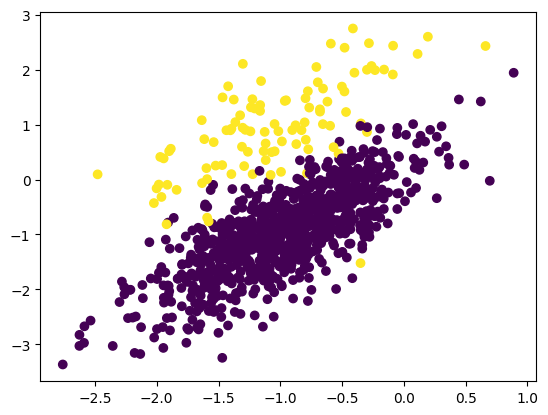

In [28]:
plt.scatter(df['f1'],df['f2'],c = df['target'])   ##This is before the SMOTE apply

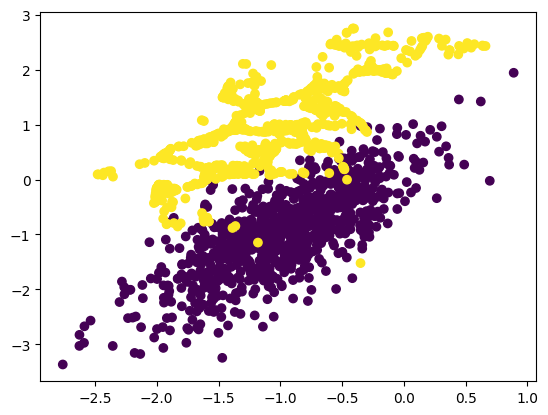

In [30]:
## After the SOMTE applied 
plt.scatter(oversample_df['f1'],oversample_df['f2'],c = oversample_df['target'])  
## Here we can see that how the yellow minority nearest point are connect to data (get an synthetic data using the technique called interpolating)